# <center> Güney Marmara ve TRAI
# <center> Python Veri Analizi Eğitimi
# <center> Ödev 3

In [93]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import yfinance as yf
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### 2021 EUR/TRY kur tablosunun incelenmesi

1. <i> Yahoo Finance</i> sitesinden 2021 yılına ait EUR/TRY kur değerlerini indiriniz

In [95]:
kur = yf.download('EURTRY=X', start='2021-01-01', end='2021-12-31', progress=False)


In [96]:
kur

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,9.08470,9.08470,9.08470,9.08470,9.08470,0
2021-01-04,9.11047,9.11154,8.99617,9.10568,9.10568,0
2021-01-05,9.09273,9.11239,9.04298,9.08882,9.08882,0
2021-01-06,9.08044,9.09500,8.92864,9.08177,9.08177,0
2021-01-07,9.00475,9.07176,8.88154,9.00614,9.00614,0
...,...,...,...,...,...,...
2021-12-24,12.79533,13.67650,12.51641,12.79752,12.79752,0
2021-12-27,12.28318,13.03196,12.16917,12.23056,12.23056,0
2021-12-28,12.96156,13.47629,12.88283,13.05254,13.05254,0


2. Veriyi özet metodları ile inceleyiniz

In [97]:

#kur.columns = ['EUR/TRY']
#kur['Normalize EUR/TRY '] = kur['EUR/TRY']/kur.iloc[0,0]

In [98]:
kur

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,9.08470,9.08470,9.08470,9.08470,9.08470,0
2021-01-04,9.11047,9.11154,8.99617,9.10568,9.10568,0
2021-01-05,9.09273,9.11239,9.04298,9.08882,9.08882,0
2021-01-06,9.08044,9.09500,8.92864,9.08177,9.08177,0
2021-01-07,9.00475,9.07176,8.88154,9.00614,9.00614,0
...,...,...,...,...,...,...
2021-12-24,12.79533,13.67650,12.51641,12.79752,12.79752,0
2021-12-27,12.28318,13.03196,12.16917,12.23056,12.23056,0
2021-12-28,12.96156,13.47629,12.88283,13.05254,13.05254,0


In [99]:
x=kur.info()
print(x)

y=kur.head()
print(y)

z=kur.describe()
print(z)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2021-01-01 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       260 non-null    float64
 1   High       260 non-null    float64
 2   Low        260 non-null    float64
 3   Close      260 non-null    float64
 4   Adj Close  260 non-null    float64
 5   Volume     260 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.2 KB
None
               Open     High      Low    Close  Adj Close  Volume
Date                                                             
2021-01-01  9.08470  9.08470  9.08470  9.08470    9.08470       0
2021-01-04  9.11047  9.11154  8.99617  9.10568    9.10568       0
2021-01-05  9.09273  9.11239  9.04298  9.08882    9.08882       0
2021-01-06  9.08044  9.09500  8.92864  9.08177    9.08177       0
2021-01-07  9.00475  9.07176  8.88154  9.00614    9.00614       0
             Open        High         L

3. Veri temizleme: <br>
	• Tabloda sadece "Adj Close" (düzeltilmiş kapanış) sütununu bırakınız.<br>
	• "Adj Close" sütununu " Kapanış (TRY)" olarak yeniden adlandırınız.

In [100]:
kur = kur[['Adj Close']]
kur.columns = ['Kapanış (TRY)']
kur

,Kapanış (TRY)
Date,
2021-01-01,9.08470
2021-01-04,9.10568
2021-01-05,9.08882
2021-01-06,9.08177
2021-01-07,9.00614
...,...
2021-12-24,12.79752
2021-12-27,12.23056
2021-12-28,13.05254


4. Tabloya yeni sütun ekleme:<br>
	• Tabloya yeni bir sütun ekleyerek Kapanış (TRY) değerlerini 1 Ocak 2021 tarihindeki kapanış değerine göre normalize ediniz.<br>
	• BIST30 endeksinin 2021 yılı boyunca değişimini yorumlayınız.

In [130]:

norm = kur.iloc[0,0]
kur['Normalize  EUR/TRY'] = kur['Kapanış (TRY)']/norm
kur

<ipython-input-130-c66859960c63>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Kapanış (TRY),Normalize EUR/TRY
Date,,
2021-01-01,9.08470,1.000000
2021-01-04,9.10568,1.002309
2021-01-05,9.08882,1.000454
2021-01-06,9.08177,0.999678
2021-01-07,9.00614,0.991353
...,...,...
2021-12-24,12.79752,1.408689
2021-12-27,12.23056,1.346281
2021-12-28,13.05254,1.436761


1 ocak 2021 den 30 aralıkta 1.57 oranında EUR/TRY oranında artış görülmektedir.

5. Veriyi grafik olarak inceleyiniz:<br>
	• Tabloyu px grafiği olarak görselleştiriniz.<br>
	• Tabloyu go. grafiği olarak görselleştiriniz.

In [121]:
fig1 = px.line(kur,y=kur['Normalize  EUR/TRY'] ,
                title='Normalize(1 Ocak 2021)',
)


fig2 = go.Figure()
fig2.add_trace(go.Bar(x=kur.index,y=kur['Normalize  EUR/TRY']))
fig2.update_layout(title = 'Normalize(1 Ocak 2021)',
                   xaxis_title='Tarih',xaxis_dtick='M1',
                   yaxis_title='Kur Endeksi(EUR/TRY)',
                   )


fig1.show()
fig2.show()

### 2021 ve 2022 değerlerini birlikte inceleme

1. <i> Yahoo Finance</i> sitesinden 2022 BIST30 ve EUR/TRY kur değerlerini indiriniz

In [122]:
indirme_listesi=['XU030.IS','EURTRY=X']
veri_2022= pd.DataFrame()

for i in indirme_listesi:
  data=yf.download(i,start='2022-01-01', end = '2022-04-01')
  data=data['Adj Close'].rename(i)
#  veri_2022 = pd.concat([veri_2022,data],axis=1)

#veri_2022

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


2. Indirdiğiniz verileri 2021 verilerini temizleyip düzenlediğiniz üzere hazırlayınız.

In [123]:
#indirme_listesi=['XU100.IS','TRY=X']
veri_2021= pd.DataFrame()

for i in indirme_listesi:
  data=yf.download(i,start='2021-01-01', end = '2021-12-31')
  data=data['Adj Close'].rename(i)
  veri_2021 = pd.concat([veri_2021,data],axis=1)

veri_2021.columns=['Kapanış(TRY)','EUR/TRY']
veri_2021=veri_2021[veri_2021['Kapanış(TRY)']>0]
veri_2021

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Kapanış(TRY),EUR/TRY
2021-01-04,1652.900024,9.10568
2021-01-05,1640.400024,9.08882
2021-01-06,1657.699951,9.08177
2021-01-07,1678.199951,9.00614
2021-01-08,1694.400024,8.99850
...,...,...
2021-12-24,2086.800049,12.79752
2021-12-27,2089.399902,12.23056
2021-12-28,2032.900024,13.05254
2021-12-29,2086.300049,13.35252


3. 2021 ve 2022 veri tablolarını tek bir tablo haline getiriniz.

In [124]:
veri = pd.concat([veri_2021,veri_2022],axis=0)
veri

,Kapanış(TRY),EUR/TRY
2021-01-04,1652.900024,9.10568
2021-01-05,1640.400024,9.08882
2021-01-06,1657.699951,9.08177
2021-01-07,1678.199951,9.00614
2021-01-08,1694.400024,8.99850
...,...,...
2021-12-24,2086.800049,12.79752
2021-12-27,2089.399902,12.23056
2021-12-28,2032.900024,13.05254
2021-12-29,2086.300049,13.35252


4. Veriyi grafik olarak inceleyiniz:<br>
	• Tabloları px grafiği olarak görselleştiriniz.<br>
	• Tabloları go. grafiği olarak görselleştiriniz.<br>
	• Tabloları subplots grafiği olarak görselleştiriniz.

<ipython-input-136-81945ea9d531>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



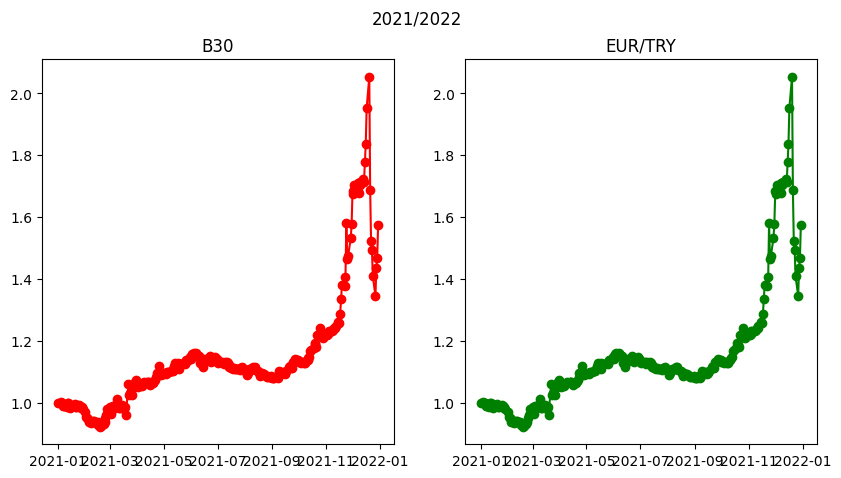

In [136]:
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

norm = kur.iloc[0,0]
kur['Normalize EUR/TRY'] = kur['Kapanış (TRY)'] / norm

fig1 = px.line(kur, y='Normalize EUR/TRY', title='Normalize(1 Ocak 2021)')
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=kur.index, y=kur['Normalize EUR/TRY'], name ='Normalize B30'))
fig2.add_trace(go.Scatter(x=kur.index, y=kur['Normalize EUR/TRY'], name='EUR/TRY'))
fig2.update_layout(title='Normalize B30 ve Kur', xaxis_title='Tarih', xaxis_dtick='M1', yaxis_title='Kur Endeksi(EUR/TRY)')
fig2.show()

fig_3 = plt.figure(figsize=(10, 5))
ax1 = fig_3.add_subplot(121)
ax1.plot(kur.index, kur['Normalize EUR/TRY'], color="red", marker="o")
ax1.set_title("B30")
 
ax2 = fig_3.add_subplot(122)
ax2.plot(kur.index, kur['Normalize EUR/TRY'], color="green", marker="o")
ax2.set_title("EUR/TRY")

fig_3.suptitle("2021/2022")
plt.show()
